# <font color='#0E6655'> <b> <center> CUSTOMER SEGMENTATION </center> </b> </font>

## <font color='blue'> <b> Table of Contents </b> </font>

1. [Objectives](#1)
2. [Modules](#2)
3. [Loading, exploring and pre-processing data](#3)
4. [Clustering with K-Means](#4)



<a name="1"></a> 
## <font color='green'> <b> 1. Objectives </font> </a>

Use K-Means for customer segmentation.

<a name="2"></a> 
## <font color='green'> <b> 2. Modules </font> </a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

from sklearn.manifold import TSNE


import warnings

warnings.filterwarnings('ignore')


<a name="3"></a> 
## <font color='green'> <b> 3. Helper Functions </font> </a>

In [2]:
# Apply t-SNE to reduce dimensions to 2D
def plot_cluster(X,  um_clusters):
    tsne = TSNE(n_components=2, random_state=0)
    X_tsne = tsne.fit_transform(X)
    
    # Visualize the clusters
    plt.figure(figsize=(10, 8))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.title(f"t-SNE Visualization of K-means Clustering ({num_clusters} Clusters)")
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(label='Cluster')
    plt.show()


# plot silhouette scores
def plot_sil_score(k_values, silhouette_scores):
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()


# plot elems per cluster
def plot_elems_per_cluster(elements_per_cluster):
    # Suppose 'elements_per_cluster' is a list or array with the count of elements per cluster
    # Example: elements_per_cluster = [100, 80, 60, 50] for 4 clusters
    num_clusters = len(elements_per_cluster)
    x = list(range(num_clusters))
    
    # Generate colors using a colormap (viridis, tab10, etc.)
    cmap = cm.get_cmap('viridis', num_clusters)  # You can change 'tab10' to another map if needed
    colors = [cmap(i) for i in range(num_clusters)]
    
    plt.bar(x, elements_per_cluster, color=colors)
    
    plt.title('Number of Elements per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Elements')
    plt.xticks(x, [f'Cluster {i}' for i in x])
    
    # Create legend dynamically
    labels = [f'Cluster {i}' for i in x]
    handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in x]
    plt.legend(handles, labels, title='Clusters')
    
    plt.tight_layout()
    plt.show()


<a name="3"></a> 
## <font color='green'> <b> 3. Data loading, exploration and pre-processing </font> </a>

In [3]:
!cd data && ls

Customer_Segmentation.csv


In [4]:
df = pd.read_csv('data/Customer_Segmentation.csv')
df.head()
df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'DebtIncomeRatio'],
      dtype='object')

In [5]:
df.isnull().sum()

Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
DebtIncomeRatio    0
dtype: int64

We can see that all variables are numerical and we have no null values.
Our next step will be standarize this numerical features.

In [6]:
X = df.values[:,1:] # we take all values except of course the index in the dataframe
X = np.nan_to_num(X)

# normalize
X_std = StandardScaler().fit_transform(X)

In [7]:
X_std[:2]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.62196731,
        -0.52096003, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.49318129,
         1.55956554,  0.39138677]])

<a name="5"></a> 
## <font color='green'> <b> 5. Clustering with K-Means</font> </a>

We will implement K-Means clustering. To do that, we first need to determine the optimal number of clusters, k. We will use two methods to find it: 
- The elbow method.
- The silhouette score.

<a name="5.1"></a> 
### <font color='#148f77'> <b> 5.1. Finding the optimal value of k </font> </a>

### Elbow Method

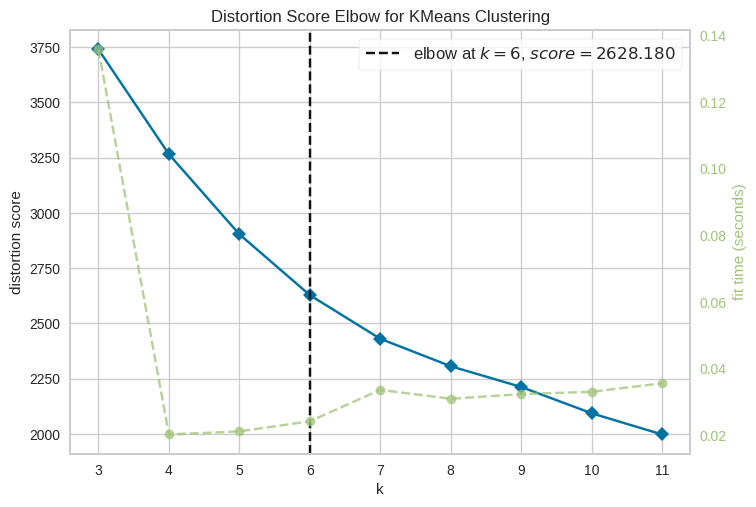

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12))

visualizer.fit(X_std)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

With this method, the best value of k is 6.

### Silhouette Method

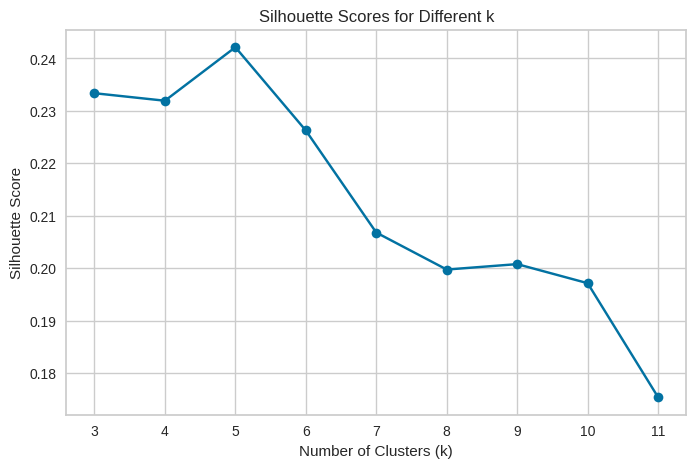

In [9]:
from sklearn.metrics import silhouette_score

# Try different k values and calculate silhouette scores
silhouette_scores = []
k_values = range(3, 12)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_std)
    score = silhouette_score(X_std, labels)
    silhouette_scores.append(score)

# plot scores
plot_sil_score(k_values, silhouette_scores)



With this method, the best value of k is 5.

### Choosing k

Since the values of k suggested by each method differ, we will choose the one given by the silhouette method. This is because, in practice (and also slightly in this case) the elbow is often not clear or subjective, and the silhouette score tends to perform better.


**Note**. Neither method is perfect — combining both (and visual inspection) is often best. For example Silhouette tends to favor fewer clusters, sometimes oversimplifying structure.

In [10]:
k = 5

<a name="5.2"></a> 
### <font color='#148f77'> <b> 5.1. Implementing K-Means </font> </a>


In [11]:
# number of clusters
num_clusters = k

# run k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X_std)

# labels
labels = kmeans.labels_
kmeans.labels_[0:10] 

array([1, 2, 0, 1, 2, 3, 1, 4, 1, 3], dtype=int32)

### Visualization

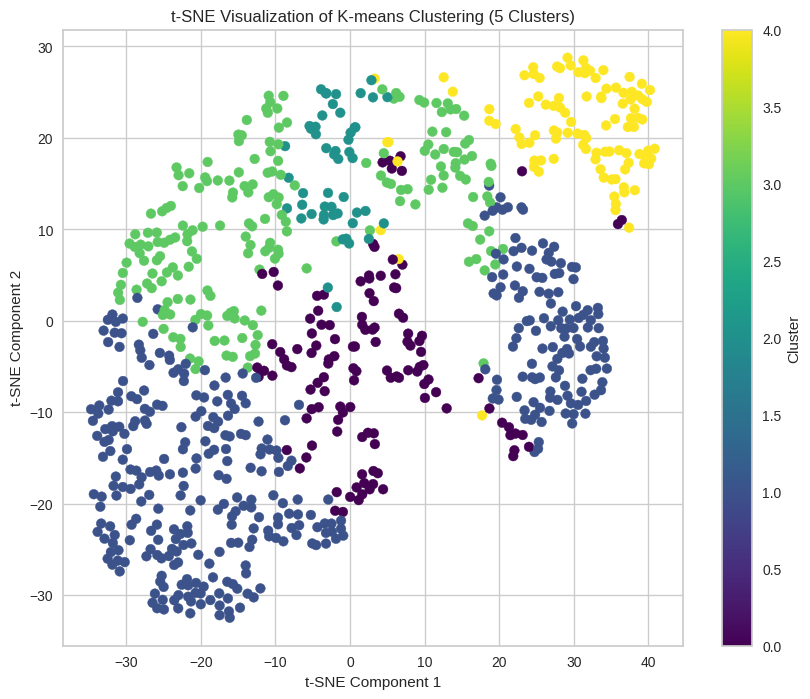

In [12]:
plot_cluster(X_std, num_clusters)

**Insert labels**

In [13]:
# insert the labels
df.insert(0, 'Cluster Labels', kmeans.labels_) #df["Cluster Labels"] = labels
df.head()

,Cluster Labels,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,1,1,41,2,6,19,124.0,1073.0,6.3
1,2,2,47,1,26,100,4582.0,8218.0,12.8
2,0,3,33,2,10,57,6111.0,5802.0,20.9
3,1,4,29,2,4,19,681.0,516.0,6.3
4,2,5,47,1,31,253,9308.0,8908.0,7.2


<a name="6"></a> 
## <font color='green'> <b> 6. Analysis</font> </a>

Let' see some of the clusters:

In [14]:
df.loc[df['Cluster Labels'] == 0].head(3)

,Cluster Labels,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
2,0,3,33,2,10,57,6111.0,5802.0,20.9
13,0,14,46,1,6,30,1415.0,3865.0,17.6
22,0,23,28,3,6,47,5574.0,3732.0,19.8


In [15]:
df.loc[df['Cluster Labels'] == 1].head(3)

,Cluster Labels,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,1,1,41,2,6,19,124.0,1073.0,6.3
3,1,4,29,2,4,19,681.0,516.0,6.3
6,1,7,38,2,4,56,442.0,454.0,1.6


#### Number of elements per cluster

In [16]:
elements_per_cluster = [len(df.loc[df['Cluster Labels'] == n].index) for n in range(0,num_clusters)]
elements_per_cluster

[123, 377, 50, 197, 103]

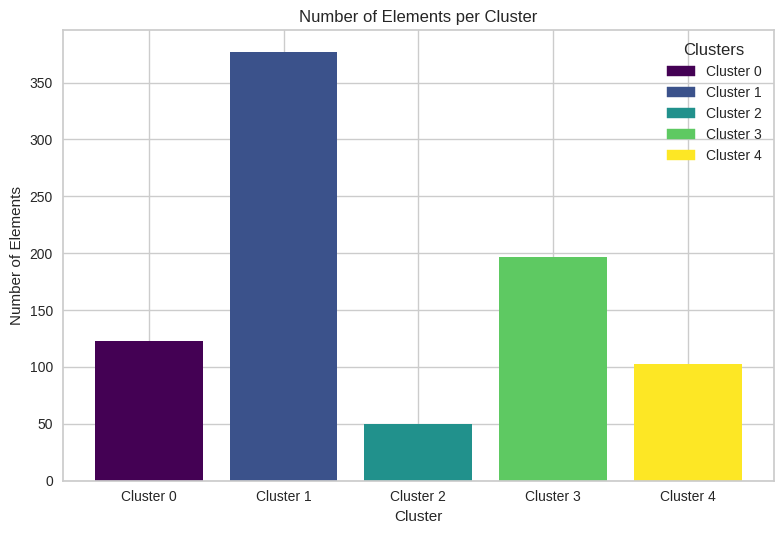

In [17]:
plot_elems_per_cluster(elements_per_cluster)

#### Summary statistics

We can check the centroid values by averaging the features in each cluster.

In [18]:
df.groupby('Cluster Labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Cluster Labels,,,,,,,,
0,429.967480,34.577236,1.691057,6.861789,37.845528,2368.163252,4691.198943,20.660163
1,439.318302,30.684350,1.331565,5.100796,27.946950,566.802918,1254.481220,7.671088
2,439.060000,42.920000,2.100000,18.120000,137.140000,7071.580000,12026.280000,16.698000
3,401.558376,42.456853,1.431472,15.827411,67.116751,1334.972487,2789.849188,7.569036
4,408.796117,33.436893,3.466019,4.757282,42.757282,952.625243,2251.555146,8.608738


#### Cluster Interpretation

**Cluster 0**

- Mid-30s, moderate income (~$38k).

- High debt (~$7k total), very high debt-to-income (20.7).

- Education = 1.7 (probably low-medium).

🧾 Segment Name: Financially Overextended Middle-Income Adults

⚠️ High-risk group — moderate earners but heavy debt burden.


**Cluster 1**
Younger group (30 years) with lowest income (~$28k).

- ow debt in absolute terms, but moderate debt ratio (7.7).

- Low education (1.3), low experience.

🧾 Segment Name: Young, Low-Income, Low Debt

- Entry-level earners with modest financial obligations.

- Possibly low-risk due to small exposure.

**Cluster 2**
- Older group (~43), high income (around $137k).

- Very high debt (~$19k), high debt ratio (16.7).

- High experience (18 yrs), average education (2.1).

🧾 Segment Name: High-Income, High-Debt Seniors

- Likely investors or professionals with large credit lines.

- Could be medium-to-high risk due to large exposure.

**Cluster 3**
- Similar age to Cluster 2, but lower income (~$67k).

- Lower debt and debt ratio (~7.6).

- Medium experience and very low education (1.4).

🧾 Segment Name: Mature, Financially Balanced

- Possibly blue-collar or self-made professionals with stable finances.

**Cluster 4**
- Young-Mid age (33) with higher education (3.5).

- Low income (~$43k), low experience (4.76 yrs).

- Moderate debt, moderate debt ratio (8.6).

🧾 Segment Name: Well-Educated Early Professionals

- Possibly recent graduates with potential for income growth.

**Summary**


| Cluster | Segment Name                        | Risk Level     | Notes                            |
| ------: | ----------------------------------- | -------------- | -------------------------------- |
|       0 | Financially Overextended Mid-Income | 🔴 High        | High debt ratio                  |
|       1 | Young, Low-Income, Low Debt         | 🟡 Low-Med     | Low income, small debt           |
|       2 | High-Income, High-Debt Seniors      | 🟡-🔴 Med-High | High exposure                    |
|       3 | Mature, Financially Balanced        | 🟢 Low         | Stable                           |
|       4 | Well-Educated Early Professionals   | 🟡 Medium      | Low experience, growth potential |


<a name="7"></a> 
## <font color='green'> <b> 7. Using Cluster Information </font> </a>

### Personalized Communication Strategies per Cluster

Based on the k-means clustering of customer financial data, we identified five distinct customer segments. Below is a tailored communication plan for each cluster.

---

#### 🧩 Cluster 0: *Financially Overextended Mid-Income Adults*

**Profile:**  
- Mid-30s, moderate income  
- Very high debt-to-income ratio  
- Possibly struggling with financial burden

**🎯 Communication Strategy:**
- **Tone:** Supportive, helpful, non-judgmental
- **Content:**
  - Offer **financial counseling**, budgeting tools
  - Promote **debt consolidation** or lower-interest refinancing
  - Suggest **repayment plans** with flexibility
  - Avoid pushing new credit unless risk-managed
- **Example Message:**  
  > "We're here to help you manage your finances more easily — explore flexible repayment options designed for your current needs."

---

#### 🧩 Cluster 1: *Young, Low-Income, Low Debt*

**Profile:**  
- Youngest group, low income and debt  
- Likely at the beginning of financial independence

**🎯 Communication Strategy:**
- **Tone:** Encouraging, educational
- **Content:**
  - Offer **starter financial products** (secured cards, student loans)
  - Share **educational content** on credit building, saving, budgeting
  - Promote **apps/tools** for tracking expenses and income
- **Example Message:**  
  > "Start building a strong financial future — check out tools and tips for managing your first credit accounts."

---

#### 🧩 Cluster 2: *High-Income, High-Debt Seniors*

**Profile:**  
- High income, high experience  
- Very high debt and credit exposure  
- Possibly business owners or leveraged investors

**🎯 Communication Strategy:**
- **Tone:** Respectful, premium-focused
- **Content:**
  - Recommend **wealth management** and tax optimization services
  - Offer **premium credit products** or investment advice
  - Monitor for credit stress, offer **liquidity options** proactively
- **Example Message:**  
  > "Your financial growth deserves the best — discover investment tools and personalized credit solutions for high achievers."

---

#### 🧩 Cluster 3: *Mature, Financially Balanced*

**Profile:**  
- Middle-aged, mid-to-high income  
- Low debt and strong financial health

**🎯 Communication Strategy:**
- **Tone:** Loyal, relationship-focused
- **Content:**
  - Promote **rewards/loyalty programs**
  - Offer **retirement planning** or investment services
  - Encourage **referrals** and acknowledge status
- **Example Message:**  
  > "Thanks for being a valued customer — get rewarded with exclusive offers and smarter savings options."

---

#### 🧩 Cluster 4: *Well-Educated Early Professionals*

**Profile:**  
- Young-mid age, **highest education level**  
- Low-to-medium income and debt  
- Likely early in their career with growth potential

**🎯 Communication Strategy:**
- **Tone:** Empowering, aspirational
- **Content:**
  - Promote **career-aligned financial tools**
  - Offer **credit-building advice** and investment starters
  - Emphasize **mobile-first**, fast-access solutions
- **Example Message:**  
  > "You’re off to a strong start — explore tools to build wealth and achieve your goals faster."

---

#### Bonus: Multichannel Tips

| Channel       | Use Case                                  |
|---------------|--------------------------------------------|
| **Email**     | Educational content, offers, statements    |
| **SMS**       | Payment reminders, urgent alerts           |
| **App Push**  | Spending summaries, goal tracking          |
| **Advisor Call** | Premium support, complex financial needs |

---

This segmentation can now be used to personalize marketing campaigns, product recommendations, and risk management strategies.
